In [1]:
import pandas as pd
arquivo1=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.08.27_ProcessamentoDaLinguagem/PrevendoAProximaPalavra/hotel-reviews.csv')

In [2]:
pd.set_option('display.max_colwidth',None) #mostrando toda a largura da coluna, sem abreviar
arquivo1

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,Edge,Mobile,not happy
1,id10327,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",Internet Explorer,Mobile,not happy
2,id10328,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\r\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\r\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\r\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",Mozilla,Tablet,not happy
3,id10329,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",InternetExplorer,Desktop,happy
4,id10330,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\r\nThe rooms were fine. They were clean with well appointed

In [3]:
arquivo1.shape

(38932, 5)

In [4]:
#limitando o tamanho do nosso dataset para agilizar o processamento
arquivo2=arquivo1[:500]

In [5]:
arquivo2.shape

(500, 5)

In [6]:
import re
#passando todas as palavras para lowercasea
arquivo2['Description']=[x.lower() for x in arquivo2['Description']]
arquivo2['Description']=arquivo2['Description'].apply((lambda x: re.sub('[^a-z0-9\s]','',x)))

C:\Users\Falcone\AppData\Local\Temp/ipykernel_17280/2678621724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arquivo2['Description']=[x.lower() for x in arquivo2['Description']]
C:\Users\Falcone\AppData\Local\Temp/ipykernel_17280/2678621724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arquivo2['Description']=arquivo2['Description'].apply((lambda x: re.sub('[^a-z0-9\s]','',x)))


In [7]:
arquivo2.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing,Edge,Mobile,not happy
1,id10327,i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staff in the elevator one evening and i mentioned the ice machine to them severel hours later a maid appeared at my door with ice and two mints im not sure how they knew what room i was in that was a little unnerving i would stay here again for business but would not come here on vacation,Internet Explorer,Mobile,not happy
2,id10328,i booked this hotel through hotwire at the lowest price i could find when we got there the front desk manager gave us a smoking room i argued that i have a little baby and i would not have booked the room had i known it was smoking the manager would not hear anything further and told me that hotwire books the cheapest rooms that are available so from the get go i was very unhappy\r\nafter a great deal of persuasion and discussion i got a nonsmoking room thereafter the room had the most minimal amenities besides the great location near dupont circle there was not much to say about this overpriced hotel the room was small and in ok condition the bathroom was small with a tub the bathroom amenities were also minimal we did not have a fridge or a microwave and had to again rent a fridge from the staff to keep baby things\r\nthe parking costs per day so it is best not to drive here also the breakfast is not included the lobby is very small and feels old the only thing available is coffee in the lobby which is decent\r\nall in all poor service minimal amenities small rooms small bathrooms no view but great location some distance from the metro either mcpherson station or dupont station try to look for better if available,Mozilla,Tablet,not happy
3,id10329,stayed here with husband and sons on the way to an alaska cruise we all loved the hotel great experience ask for a room on the north tower facing north west for the best views we had a high floor with a stunning view of the needle the city and even the cruise ships we ordered room service for dinner so we could enjoy the perfect views room service dinners were delicious too you are in a perfect spot to walk everywhere so enjoy the city almost forgot heavenly beds were heavenly too,InternetExplorer,Desktop,happy
4,id10330,my girlfriends and i stayed here to celebrate our th birthdays we had planned this weekend getaway back in february so we were all looking forward to it there was of us so we rented ajoining rooms at the rate of nightroom we stayed nights so with taxes and parking charges we spent in total over all of us expected a certain level of service since we were staying at the ritz however this hotel certainly didnt meet what we would consider ritz standards\r\nthe rooms were fine they were clean with well appointed bathrooms but nothing to get excited about the service however was awful the first night we were there i made calls to the bell man before someone in hotel communications picked up the phone then on saturday night before we left for dinner at we requested to have ex

In [8]:
#agrupando todas as descrições em um unico texto
texto_total=arquivo2['Description'].str.cat(sep=' ')

In [9]:
#visualizando uma parte deste texto
texto_total[0:5000]

'the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing i stayed at the crown plaza april   april   the staff was friendly and attentive the elevators are tiny about  by  the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staf

In [10]:
#eliminando possiveis espaços multiplos, \r e \n
texto_total=' '.join(texto_total.split()) #o split eliminada as quebras de pagina e o join,
#junta novamente com base nos espaços
#estranho, pois no texto acima nao tinha \r e \n....

In [11]:
texto_total[0:5000]

'the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced a little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is a little small by todays standards with a limited number of channels there was a small bit of mold in the bathtub area that could have been removed with a little bleach it appeared the carpets were not vacummed every day i reported a light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work i encountered some staff in t

In [12]:
#convertendo esse texto em uma lista (cada elemento da lista será uma palavra)
texto_total=list(texto_total.split(' '))

In [13]:
texto_total
#print(texto_total)

['the',
 'room',
 'was',
 'kind',
 'of',
 'clean',
 'but',
 'had',
 'a',
 'very',
 'strong',
 'smell',
 'of',
 'dogs',
 'generally',
 'below',
 'average',
 'but',
 'ok',
 'for',
 'a',
 'overnight',
 'stay',
 'if',
 'youre',
 'not',
 'too',
 'fussy',
 'would',
 'consider',
 'staying',
 'again',
 'if',
 'the',
 'price',
 'was',
 'right',
 'breakfast',
 'was',
 'free',
 'and',
 'just',
 'about',
 'better',
 'than',
 'nothing',
 'i',
 'stayed',
 'at',
 'the',
 'crown',
 'plaza',
 'april',
 'april',
 'the',
 'staff',
 'was',
 'friendly',
 'and',
 'attentive',
 'the',
 'elevators',
 'are',
 'tiny',
 'about',
 'by',
 'the',
 'food',
 'in',
 'the',
 'restaurant',
 'was',
 'delicious',
 'but',
 'priced',
 'a',
 'little',
 'on',
 'the',
 'high',
 'side',
 'of',
 'course',
 'this',
 'is',
 'washington',
 'dc',
 'there',
 'is',
 'no',
 'pool',
 'and',
 'little',
 'for',
 'children',
 'to',
 'do',
 'my',
 'room',
 'on',
 'the',
 'fifth',
 'floor',
 'had',
 'two',
 'comfortable',
 'beds',
 'and',
 '

In [14]:
len(texto_total)

79069

In [15]:
#agrupando sequencias de 6 palavras
tamanho_frases=6
sequencias_texto=[]
for i in range(tamanho_frases, len(texto_total)):
    sequencia=texto_total[i-tamanho_frases:i] #pega 5ª palavras e prevê a 6ª
    sequencias_texto.append(sequencia)

In [16]:
sequencias_texto

[['the', 'room', 'was', 'kind', 'of', 'clean'],
 ['room', 'was', 'kind', 'of', 'clean', 'but'],
 ['was', 'kind', 'of', 'clean', 'but', 'had'],
 ['kind', 'of', 'clean', 'but', 'had', 'a'],
 ['of', 'clean', 'but', 'had', 'a', 'very'],
 ['clean', 'but', 'had', 'a', 'very', 'strong'],
 ['but', 'had', 'a', 'very', 'strong', 'smell'],
 ['had', 'a', 'very', 'strong', 'smell', 'of'],
 ['a', 'very', 'strong', 'smell', 'of', 'dogs'],
 ['very', 'strong', 'smell', 'of', 'dogs', 'generally'],
 ['strong', 'smell', 'of', 'dogs', 'generally', 'below'],
 ['smell', 'of', 'dogs', 'generally', 'below', 'average'],
 ['of', 'dogs', 'generally', 'below', 'average', 'but'],
 ['dogs', 'generally', 'below', 'average', 'but', 'ok'],
 ['generally', 'below', 'average', 'but', 'ok', 'for'],
 ['below', 'average', 'but', 'ok', 'for', 'a'],
 ['average', 'but', 'ok', 'for', 'a', 'overnight'],
 ['but', 'ok', 'for', 'a', 'overnight', 'stay'],
 ['ok', 'for', 'a', 'overnight', 'stay', 'if'],
 ['for', 'a', 'overnight', 'sta

In [17]:
sequencias_texto[0]

['the', 'room', 'was', 'kind', 'of', 'clean']

In [18]:
len(sequencias_texto[0])

6

In [19]:
import numpy as np
np.shape(sequencias_texto)

(79063, 6)

In [20]:
#criando a variavel X com as palavras tokenizadas:
from keras.preprocessing.text import Tokenizer
tokenizador=Tokenizer()
tokenizador.fit_on_texts(sequencias_texto)
X = tokenizador.texts_to_sequences(sequencias_texto)

In [21]:
X

[[1, 14, 5, 508, 8, 54],
 [14, 5, 508, 8, 54, 18],
 [5, 508, 8, 54, 18, 23],
 [508, 8, 54, 18, 23, 3],
 [8, 54, 18, 23, 3, 21],
 [54, 18, 23, 3, 21, 1542],
 [18, 23, 3, 21, 1542, 509],
 [23, 3, 21, 1542, 509, 8],
 [3, 21, 1542, 509, 8, 1817],
 [21, 1542, 509, 8, 1817, 759],
 [1542, 509, 8, 1817, 759, 706],
 [509, 8, 1817, 759, 706, 415],
 [8, 1817, 759, 706, 415, 18],
 [1817, 759, 706, 415, 18, 277],
 [759, 706, 415, 18, 277, 10],
 [706, 415, 18, 277, 10, 3],
 [415, 18, 277, 10, 3, 883],
 [18, 277, 10, 3, 883, 35],
 [277, 10, 3, 883, 35, 41],
 [10, 3, 883, 35, 41, 253],
 [3, 883, 35, 41, 253, 26],
 [883, 35, 41, 253, 26, 136],
 [35, 41, 253, 26, 136, 1337],
 [41, 253, 26, 136, 1337, 37],
 [253, 26, 136, 1337, 37, 668],
 [26, 136, 1337, 37, 668, 150],
 [136, 1337, 37, 668, 150, 72],
 [1337, 37, 668, 150, 72, 41],
 [37, 668, 150, 72, 41, 1],
 [668, 150, 72, 41, 1, 146],
 [150, 72, 41, 1, 146, 5],
 [72, 41, 1, 146, 5, 160],
 [41, 1, 146, 5, 160, 58],
 [1, 146, 5, 160, 58, 5],
 [146, 5, 16

In [22]:
tamanho_vocabulario = len(tokenizador.word_index)+1 #=> soma introduzida pelo Natanael
#motivo: IndexError: index 6408 is out of bounds for axis 1 with size 6408 na celula #transformando a variavel target em categorias
print('Tamanho do vocabulario de palavras:',tamanho_vocabulario)

Tamanho do vocabulario de palavras: 6409


In [23]:
print(tokenizador.word_index) #palavras mais frequentes

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'was': 5, 'i': 6, 'in': 7, 'of': 8, 'we': 9, 'for': 10, 'is': 11, 'hotel': 12, 'it': 13, 'room': 14, 'that': 15, 'at': 16, 'on': 17, 'but': 18, 'with': 19, 'were': 20, 'very': 21, 'this': 22, 'had': 23, 'you': 24, 'my': 25, 'not': 26, 'have': 27, 'our': 28, 'they': 29, 'as': 30, 'there': 31, 'are': 32, 'so': 33, 'from': 34, 'stay': 35, 'staff': 36, 'would': 37, 'great': 38, 'be': 39, 'all': 40, 'if': 41, 'rooms': 42, 'nice': 43, 'location': 44, 'one': 45, 'when': 46, 'good': 47, 'no': 48, 'out': 49, 'me': 50, 'just': 51, 'stayed': 52, 'night': 53, 'clean': 54, 'us': 55, 'an': 56, 'which': 57, 'breakfast': 58, 'service': 59, 'here': 60, 'only': 61, 'or': 62, 'about': 63, 'get': 64, 'up': 65, 'its': 66, 'time': 67, 'also': 68, 'well': 69, 'like': 70, 'desk': 71, 'again': 72, 'really': 73, 'could': 74, 'area': 75, 'did': 76, 'bed': 77, 'floor': 78, 'didnt': 79, 'back': 80, 'more': 81, 'will': 82, 'other': 83, 'free': 84, 'comfortable': 85, 'day': 86, 

In [24]:
dataset=pd.DataFrame(X)

In [25]:
dataset

,0,1,2,3,4,5
0,1,14,5,508,8,54
1,14,5,508,8,54,18
2,5,508,8,54,18,23
3,508,8,54,18,23,3
4,8,54,18,23,3,21
...,...,...,...,...,...,...
79058,14,57,5,3,98,2238
79059,57,5,3,98,2238,153
79060,5,3,98,2238,153,188
79061,3,98,2238,153,188,6


In [26]:
#criando as variaveis preditoras e variavel target
y=dataset[dataset.columns[5]]
x=dataset.drop(dataset.columns[5],axis=1)

In [27]:
x

,0,1,2,3,4
0,1,14,5,508,8
1,14,5,508,8,54
2,5,508,8,54,18
3,508,8,54,18,23
4,8,54,18,23,3
...,...,...,...,...,...
79058,14,57,5,3,98
79059,57,5,3,98,2238
79060,5,3,98,2238,153
79061,3,98,2238,153,188


In [28]:
y

0          54
1          18
2          23
3           3
4          21
         ... 
79058    2238
79059     153
79060     188
79061       6
79062      37
Name: 5, Length: 79063, dtype: int64

In [29]:
contagem_y=y.value_counts()

In [30]:
contagem_y.head(30)

1     5202
2     2712
3     2419
4     1969
5     1832
6     1531
7     1292
8     1111
9     1039
10     996
11     933
12     855
13     838
14     835
15     678
16     651
17     642
18     614
19     599
20     596
21     580
22     570
23     519
24     492
25     476
26     462
27     411
28     406
29     398
30     394
Name: 5, dtype: int64

<AxesSubplot:>

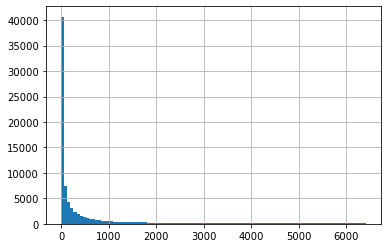

In [31]:
y.hist(bins=100)

In [32]:
#transformando a variavel target em categorias
from keras.utils import to_categorical
y=to_categorical(y, num_classes=tamanho_vocabulario)

In [33]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
type(y)

numpy.ndarray

In [35]:
dataframe_y=pd.DataFrame(y)

In [36]:
#dataframe_y.head(50,50)
dataframe_y.loc[:,18:54] 
#numero 1 na coluna 54, na primeira linha, representando o valor 54 correspondente à palavra 'clean'
#numero 1 na coluna 18, na segunda linha, representando o valor 18 correspondente à palavra 'but'

,18,19,20,21,22,23,24,25,26,27,...,45,46,47,48,49,50,51,52,53,54
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Separando os dados em treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste=train_test_split(x,y,test_size=0.3)
print('Tamanho do treino:',x_treino.shape, y_treino.shape)
print('Tamanho do teste:',x_teste.shape, y_teste.shape)

Tamanho do treino: (55344, 5) (55344, 6409)
Tamanho do teste: (23719, 5) (23719, 6409)


In [38]:
x_treino.value_counts(ascending=True) #o que significa essa tabela?
#Na verdade, quero saber se no x_treino todas as palavras(numeros) do vocabulario estao presentes
#Fazer um loop da funçao loc??

0    1    2     3    4 
1    1    35    37   27    1
205  352  1020  6    73    1
     367  6     134  4     1
     439  9     23   3     1
     507  16    13   5     1
                          ..
37   156  35    60   72    5
6    37   35    60   72    5
2    6    52    16   1     6
160  7    1     505  8     6
14   17   1     122  78    6
Length: 54907, dtype: int64

In [39]:
#Verificando a ocorrencia dos numeros na tabela x_treino
print('qtd linhas x_treino:',x_treino.shape[0])
for i in range(1, tamanho_vocabulario):
    resultado2=x_treino.loc[x_treino[0]==i]
    resultado2
    print('frequencia do numero:', i, resultado2.shape[0])
    #len(resultado2)
    if resultado2.shape[0] < 1:
        print('numero com pouco frequencia na tabela')

qtd linhas x_treino: 55344
frequencia do numero: 1 3664
frequencia do numero: 2 1931
frequencia do numero: 3 1679
frequencia do numero: 4 1322
frequencia do numero: 5 1278
frequencia do numero: 6 1063
frequencia do numero: 7 879
frequencia do numero: 8 785
frequencia do numero: 9 726
frequencia do numero: 10 690
frequencia do numero: 11 641
frequencia do numero: 12 622
frequencia do numero: 13 589
frequencia do numero: 14 589
frequencia do numero: 15 473
frequencia do numero: 16 435
frequencia do numero: 17 442
frequencia do numero: 18 428
frequencia do numero: 19 420
frequencia do numero: 20 418
frequencia do numero: 21 399
frequencia do numero: 22 399
frequencia do numero: 23 365
frequencia do numero: 24 351
frequencia do numero: 25 338
frequencia do numero: 26 320
frequencia do numero: 27 307
frequencia do numero: 28 262
frequencia do numero: 29 263
frequencia do numero: 30 276
frequencia do numero: 31 268
frequencia do numero: 32 263
frequencia do numero: 33 250
frequencia do numer

frequencia do numero: 331 26
frequencia do numero: 332 22
frequencia do numero: 333 25
frequencia do numero: 334 25
frequencia do numero: 335 27
frequencia do numero: 336 21
frequencia do numero: 337 20
frequencia do numero: 338 25
frequencia do numero: 339 20
frequencia do numero: 340 18
frequencia do numero: 341 27
frequencia do numero: 342 27
frequencia do numero: 343 21
frequencia do numero: 344 24
frequencia do numero: 345 24
frequencia do numero: 346 19
frequencia do numero: 347 23
frequencia do numero: 348 18
frequencia do numero: 349 24
frequencia do numero: 350 24
frequencia do numero: 351 24
frequencia do numero: 352 23
frequencia do numero: 353 20
frequencia do numero: 354 22
frequencia do numero: 355 19
frequencia do numero: 356 21
frequencia do numero: 357 23
frequencia do numero: 358 18
frequencia do numero: 359 20
frequencia do numero: 360 21
frequencia do numero: 361 21
frequencia do numero: 362 23
frequencia do numero: 363 17
frequencia do numero: 364 21
frequencia do 

frequencia do numero: 639 10
frequencia do numero: 640 10
frequencia do numero: 641 11
frequencia do numero: 642 9
frequencia do numero: 643 12
frequencia do numero: 644 10
frequencia do numero: 645 10
frequencia do numero: 646 9
frequencia do numero: 647 8
frequencia do numero: 648 11
frequencia do numero: 649 9
frequencia do numero: 650 9
frequencia do numero: 651 12
frequencia do numero: 652 6
frequencia do numero: 653 11
frequencia do numero: 654 10
frequencia do numero: 655 11
frequencia do numero: 656 11
frequencia do numero: 657 10
frequencia do numero: 658 6
frequencia do numero: 659 10
frequencia do numero: 660 9
frequencia do numero: 661 9
frequencia do numero: 662 10
frequencia do numero: 663 10
frequencia do numero: 664 12
frequencia do numero: 665 11
frequencia do numero: 666 9
frequencia do numero: 667 8
frequencia do numero: 668 10
frequencia do numero: 669 7
frequencia do numero: 670 12
frequencia do numero: 671 7
frequencia do numero: 672 11
frequencia do numero: 673 8

frequencia do numero: 1016 5
frequencia do numero: 1017 5
frequencia do numero: 1018 3
frequencia do numero: 1019 6
frequencia do numero: 1020 3
frequencia do numero: 1021 5
frequencia do numero: 1022 6
frequencia do numero: 1023 7
frequencia do numero: 1024 6
frequencia do numero: 1025 6
frequencia do numero: 1026 6
frequencia do numero: 1027 4
frequencia do numero: 1028 5
frequencia do numero: 1029 7
frequencia do numero: 1030 4
frequencia do numero: 1031 5
frequencia do numero: 1032 6
frequencia do numero: 1033 4
frequencia do numero: 1034 8
frequencia do numero: 1035 7
frequencia do numero: 1036 5
frequencia do numero: 1037 7
frequencia do numero: 1038 8
frequencia do numero: 1039 5
frequencia do numero: 1040 7
frequencia do numero: 1041 6
frequencia do numero: 1042 6
frequencia do numero: 1043 3
frequencia do numero: 1044 4
frequencia do numero: 1045 8
frequencia do numero: 1046 4
frequencia do numero: 1047 6
frequencia do numero: 1048 4
frequencia do numero: 1049 7
frequencia do 

frequencia do numero: 1334 4
frequencia do numero: 1335 4
frequencia do numero: 1336 6
frequencia do numero: 1337 3
frequencia do numero: 1338 4
frequencia do numero: 1339 3
frequencia do numero: 1340 4
frequencia do numero: 1341 1
frequencia do numero: 1342 3
frequencia do numero: 1343 3
frequencia do numero: 1344 4
frequencia do numero: 1345 3
frequencia do numero: 1346 5
frequencia do numero: 1347 3
frequencia do numero: 1348 1
frequencia do numero: 1349 2
frequencia do numero: 1350 3
frequencia do numero: 1351 2
frequencia do numero: 1352 4
frequencia do numero: 1353 5
frequencia do numero: 1354 5
frequencia do numero: 1355 3
frequencia do numero: 1356 4
frequencia do numero: 1357 4
frequencia do numero: 1358 2
frequencia do numero: 1359 4
frequencia do numero: 1360 3
frequencia do numero: 1361 5
frequencia do numero: 1362 3
frequencia do numero: 1363 3
frequencia do numero: 1364 5
frequencia do numero: 1365 2
frequencia do numero: 1366 2
frequencia do numero: 1367 5
frequencia do 

frequencia do numero: 1736 4
frequencia do numero: 1737 1
frequencia do numero: 1738 2
frequencia do numero: 1739 2
frequencia do numero: 1740 4
frequencia do numero: 1741 3
frequencia do numero: 1742 2
frequencia do numero: 1743 4
frequencia do numero: 1744 3
frequencia do numero: 1745 2
frequencia do numero: 1746 3
frequencia do numero: 1747 3
frequencia do numero: 1748 3
frequencia do numero: 1749 4
frequencia do numero: 1750 4
frequencia do numero: 1751 3
frequencia do numero: 1752 3
frequencia do numero: 1753 4
frequencia do numero: 1754 1
frequencia do numero: 1755 4
frequencia do numero: 1756 3
frequencia do numero: 1757 2
frequencia do numero: 1758 3
frequencia do numero: 1759 2
frequencia do numero: 1760 3
frequencia do numero: 1761 1
frequencia do numero: 1762 3
frequencia do numero: 1763 3
frequencia do numero: 1764 4
frequencia do numero: 1765 2
frequencia do numero: 1766 3
frequencia do numero: 1767 4
frequencia do numero: 1768 2
frequencia do numero: 1769 4
frequencia do 

frequencia do numero: 2042 2
frequencia do numero: 2043 1
frequencia do numero: 2044 2
frequencia do numero: 2045 2
frequencia do numero: 2046 3
frequencia do numero: 2047 1
frequencia do numero: 2048 1
frequencia do numero: 2049 2
frequencia do numero: 2050 1
frequencia do numero: 2051 1
frequencia do numero: 2052 2
frequencia do numero: 2053 3
frequencia do numero: 2054 2
frequencia do numero: 2055 1
frequencia do numero: 2056 2
frequencia do numero: 2057 1
frequencia do numero: 2058 2
frequencia do numero: 2059 1
frequencia do numero: 2060 0
numero com pouco frequencia na tabela
frequencia do numero: 2061 2
frequencia do numero: 2062 3
frequencia do numero: 2063 3
frequencia do numero: 2064 2
frequencia do numero: 2065 1
frequencia do numero: 2066 2
frequencia do numero: 2067 1
frequencia do numero: 2068 3
frequencia do numero: 2069 3
frequencia do numero: 2070 1
frequencia do numero: 2071 3
frequencia do numero: 2072 1
frequencia do numero: 2073 3
frequencia do numero: 2074 3
frequ

frequencia do numero: 2440 2
frequencia do numero: 2441 2
frequencia do numero: 2442 1
frequencia do numero: 2443 1
frequencia do numero: 2444 1
frequencia do numero: 2445 1
frequencia do numero: 2446 2
frequencia do numero: 2447 1
frequencia do numero: 2448 2
frequencia do numero: 2449 2
frequencia do numero: 2450 2
frequencia do numero: 2451 2
frequencia do numero: 2452 1
frequencia do numero: 2453 1
frequencia do numero: 2454 1
frequencia do numero: 2455 1
frequencia do numero: 2456 2
frequencia do numero: 2457 0
numero com pouco frequencia na tabela
frequencia do numero: 2458 0
numero com pouco frequencia na tabela
frequencia do numero: 2459 2
frequencia do numero: 2460 2
frequencia do numero: 2461 1
frequencia do numero: 2462 1
frequencia do numero: 2463 2
frequencia do numero: 2464 1
frequencia do numero: 2465 1
frequencia do numero: 2466 2
frequencia do numero: 2467 0
numero com pouco frequencia na tabela
frequencia do numero: 2468 1
frequencia do numero: 2469 2
frequencia do nu

frequencia do numero: 2757 0
numero com pouco frequencia na tabela
frequencia do numero: 2758 0
numero com pouco frequencia na tabela
frequencia do numero: 2759 2
frequencia do numero: 2760 2
frequencia do numero: 2761 2
frequencia do numero: 2762 2
frequencia do numero: 2763 2
frequencia do numero: 2764 2
frequencia do numero: 2765 0
numero com pouco frequencia na tabela
frequencia do numero: 2766 1
frequencia do numero: 2767 2
frequencia do numero: 2768 1
frequencia do numero: 2769 1
frequencia do numero: 2770 1
frequencia do numero: 2771 2
frequencia do numero: 2772 2
frequencia do numero: 2773 2
frequencia do numero: 2774 1
frequencia do numero: 2775 1
frequencia do numero: 2776 1
frequencia do numero: 2777 2
frequencia do numero: 2778 1
frequencia do numero: 2779 2
frequencia do numero: 2780 2
frequencia do numero: 2781 1
frequencia do numero: 2782 1
frequencia do numero: 2783 2
frequencia do numero: 2784 2
frequencia do numero: 2785 2
frequencia do numero: 2786 2
frequencia do nu

frequencia do numero: 3146 0
numero com pouco frequencia na tabela
frequencia do numero: 3147 1
frequencia do numero: 3148 0
numero com pouco frequencia na tabela
frequencia do numero: 3149 1
frequencia do numero: 3150 1
frequencia do numero: 3151 1
frequencia do numero: 3152 0
numero com pouco frequencia na tabela
frequencia do numero: 3153 0
numero com pouco frequencia na tabela
frequencia do numero: 3154 0
numero com pouco frequencia na tabela
frequencia do numero: 3155 0
numero com pouco frequencia na tabela
frequencia do numero: 3156 1
frequencia do numero: 3157 1
frequencia do numero: 3158 0
numero com pouco frequencia na tabela
frequencia do numero: 3159 0
numero com pouco frequencia na tabela
frequencia do numero: 3160 1
frequencia do numero: 3161 0
numero com pouco frequencia na tabela
frequencia do numero: 3162 1
frequencia do numero: 3163 1
frequencia do numero: 3164 0
numero com pouco frequencia na tabela
frequencia do numero: 3165 1
frequencia do numero: 3166 1
frequencia 

frequencia do numero: 3376 1
frequencia do numero: 3377 1
frequencia do numero: 3378 1
frequencia do numero: 3379 1
frequencia do numero: 3380 0
numero com pouco frequencia na tabela
frequencia do numero: 3381 1
frequencia do numero: 3382 0
numero com pouco frequencia na tabela
frequencia do numero: 3383 1
frequencia do numero: 3384 0
numero com pouco frequencia na tabela
frequencia do numero: 3385 1
frequencia do numero: 3386 0
numero com pouco frequencia na tabela
frequencia do numero: 3387 1
frequencia do numero: 3388 1
frequencia do numero: 3389 0
numero com pouco frequencia na tabela
frequencia do numero: 3390 0
numero com pouco frequencia na tabela
frequencia do numero: 3391 0
numero com pouco frequencia na tabela
frequencia do numero: 3392 1
frequencia do numero: 3393 1
frequencia do numero: 3394 0
numero com pouco frequencia na tabela
frequencia do numero: 3395 0
numero com pouco frequencia na tabela
frequencia do numero: 3396 0
numero com pouco frequencia na tabela
frequencia 

frequencia do numero: 3614 0
numero com pouco frequencia na tabela
frequencia do numero: 3615 0
numero com pouco frequencia na tabela
frequencia do numero: 3616 1
frequencia do numero: 3617 1
frequencia do numero: 3618 0
numero com pouco frequencia na tabela
frequencia do numero: 3619 1
frequencia do numero: 3620 0
numero com pouco frequencia na tabela
frequencia do numero: 3621 1
frequencia do numero: 3622 1
frequencia do numero: 3623 1
frequencia do numero: 3624 1
frequencia do numero: 3625 1
frequencia do numero: 3626 1
frequencia do numero: 3627 1
frequencia do numero: 3628 0
numero com pouco frequencia na tabela
frequencia do numero: 3629 1
frequencia do numero: 3630 1
frequencia do numero: 3631 1
frequencia do numero: 3632 1
frequencia do numero: 3633 0
numero com pouco frequencia na tabela
frequencia do numero: 3634 0
numero com pouco frequencia na tabela
frequencia do numero: 3635 1
frequencia do numero: 3636 1
frequencia do numero: 3637 1
frequencia do numero: 3638 1
frequenci

frequencia do numero: 3859 1
frequencia do numero: 3860 0
numero com pouco frequencia na tabela
frequencia do numero: 3861 0
numero com pouco frequencia na tabela
frequencia do numero: 3862 1
frequencia do numero: 3863 1
frequencia do numero: 3864 1
frequencia do numero: 3865 1
frequencia do numero: 3866 0
numero com pouco frequencia na tabela
frequencia do numero: 3867 1
frequencia do numero: 3868 1
frequencia do numero: 3869 1
frequencia do numero: 3870 0
numero com pouco frequencia na tabela
frequencia do numero: 3871 1
frequencia do numero: 3872 1
frequencia do numero: 3873 1
frequencia do numero: 3874 1
frequencia do numero: 3875 0
numero com pouco frequencia na tabela
frequencia do numero: 3876 0
numero com pouco frequencia na tabela
frequencia do numero: 3877 1
frequencia do numero: 3878 0
numero com pouco frequencia na tabela
frequencia do numero: 3879 1
frequencia do numero: 3880 1
frequencia do numero: 3881 1
frequencia do numero: 3882 1
frequencia do numero: 3883 0
numero co

frequencia do numero: 4104 1
frequencia do numero: 4105 1
frequencia do numero: 4106 0
numero com pouco frequencia na tabela
frequencia do numero: 4107 1
frequencia do numero: 4108 0
numero com pouco frequencia na tabela
frequencia do numero: 4109 1
frequencia do numero: 4110 0
numero com pouco frequencia na tabela
frequencia do numero: 4111 0
numero com pouco frequencia na tabela
frequencia do numero: 4112 0
numero com pouco frequencia na tabela
frequencia do numero: 4113 1
frequencia do numero: 4114 1
frequencia do numero: 4115 1
frequencia do numero: 4116 1
frequencia do numero: 4117 1
frequencia do numero: 4118 0
numero com pouco frequencia na tabela
frequencia do numero: 4119 1
frequencia do numero: 4120 1
frequencia do numero: 4121 1
frequencia do numero: 4122 0
numero com pouco frequencia na tabela
frequencia do numero: 4123 1
frequencia do numero: 4124 1
frequencia do numero: 4125 1
frequencia do numero: 4126 1
frequencia do numero: 4127 0
numero com pouco frequencia na tabela


frequencia do numero: 4324 1
frequencia do numero: 4325 1
frequencia do numero: 4326 0
numero com pouco frequencia na tabela
frequencia do numero: 4327 0
numero com pouco frequencia na tabela
frequencia do numero: 4328 1
frequencia do numero: 4329 1
frequencia do numero: 4330 0
numero com pouco frequencia na tabela
frequencia do numero: 4331 1
frequencia do numero: 4332 1
frequencia do numero: 4333 1
frequencia do numero: 4334 1
frequencia do numero: 4335 1
frequencia do numero: 4336 1
frequencia do numero: 4337 1
frequencia do numero: 4338 1
frequencia do numero: 4339 1
frequencia do numero: 4340 1
frequencia do numero: 4341 1
frequencia do numero: 4342 1
frequencia do numero: 4343 0
numero com pouco frequencia na tabela
frequencia do numero: 4344 1
frequencia do numero: 4345 1
frequencia do numero: 4346 1
frequencia do numero: 4347 1
frequencia do numero: 4348 1
frequencia do numero: 4349 0
numero com pouco frequencia na tabela
frequencia do numero: 4350 0
numero com pouco frequencia

frequencia do numero: 4554 0
numero com pouco frequencia na tabela
frequencia do numero: 4555 1
frequencia do numero: 4556 1
frequencia do numero: 4557 0
numero com pouco frequencia na tabela
frequencia do numero: 4558 0
numero com pouco frequencia na tabela
frequencia do numero: 4559 1
frequencia do numero: 4560 1
frequencia do numero: 4561 1
frequencia do numero: 4562 1
frequencia do numero: 4563 1
frequencia do numero: 4564 1
frequencia do numero: 4565 1
frequencia do numero: 4566 1
frequencia do numero: 4567 1
frequencia do numero: 4568 1
frequencia do numero: 4569 1
frequencia do numero: 4570 1
frequencia do numero: 4571 0
numero com pouco frequencia na tabela
frequencia do numero: 4572 0
numero com pouco frequencia na tabela
frequencia do numero: 4573 1
frequencia do numero: 4574 1
frequencia do numero: 4575 1
frequencia do numero: 4576 0
numero com pouco frequencia na tabela
frequencia do numero: 4577 1
frequencia do numero: 4578 1
frequencia do numero: 4579 0
numero com pouco f

frequencia do numero: 4773 1
frequencia do numero: 4774 1
frequencia do numero: 4775 1
frequencia do numero: 4776 1
frequencia do numero: 4777 0
numero com pouco frequencia na tabela
frequencia do numero: 4778 1
frequencia do numero: 4779 0
numero com pouco frequencia na tabela
frequencia do numero: 4780 1
frequencia do numero: 4781 1
frequencia do numero: 4782 1
frequencia do numero: 4783 1
frequencia do numero: 4784 1
frequencia do numero: 4785 1
frequencia do numero: 4786 1
frequencia do numero: 4787 1
frequencia do numero: 4788 1
frequencia do numero: 4789 1
frequencia do numero: 4790 1
frequencia do numero: 4791 0
numero com pouco frequencia na tabela
frequencia do numero: 4792 1
frequencia do numero: 4793 1
frequencia do numero: 4794 0
numero com pouco frequencia na tabela
frequencia do numero: 4795 0
numero com pouco frequencia na tabela
frequencia do numero: 4796 0
numero com pouco frequencia na tabela
frequencia do numero: 4797 1
frequencia do numero: 4798 0
numero com pouco f

frequencia do numero: 5008 1
frequencia do numero: 5009 1
frequencia do numero: 5010 1
frequencia do numero: 5011 1
frequencia do numero: 5012 0
numero com pouco frequencia na tabela
frequencia do numero: 5013 1
frequencia do numero: 5014 1
frequencia do numero: 5015 1
frequencia do numero: 5016 1
frequencia do numero: 5017 0
numero com pouco frequencia na tabela
frequencia do numero: 5018 1
frequencia do numero: 5019 1
frequencia do numero: 5020 0
numero com pouco frequencia na tabela
frequencia do numero: 5021 1
frequencia do numero: 5022 1
frequencia do numero: 5023 0
numero com pouco frequencia na tabela
frequencia do numero: 5024 0
numero com pouco frequencia na tabela
frequencia do numero: 5025 0
numero com pouco frequencia na tabela
frequencia do numero: 5026 0
numero com pouco frequencia na tabela
frequencia do numero: 5027 1
frequencia do numero: 5028 1
frequencia do numero: 5029 1
frequencia do numero: 5030 1
frequencia do numero: 5031 1
frequencia do numero: 5032 1
frequenci

frequencia do numero: 5283 1
frequencia do numero: 5284 1
frequencia do numero: 5285 1
frequencia do numero: 5286 0
numero com pouco frequencia na tabela
frequencia do numero: 5287 1
frequencia do numero: 5288 1
frequencia do numero: 5289 1
frequencia do numero: 5290 0
numero com pouco frequencia na tabela
frequencia do numero: 5291 1
frequencia do numero: 5292 1
frequencia do numero: 5293 1
frequencia do numero: 5294 1
frequencia do numero: 5295 1
frequencia do numero: 5296 1
frequencia do numero: 5297 1
frequencia do numero: 5298 1
frequencia do numero: 5299 1
frequencia do numero: 5300 1
frequencia do numero: 5301 1
frequencia do numero: 5302 0
numero com pouco frequencia na tabela
frequencia do numero: 5303 0
numero com pouco frequencia na tabela
frequencia do numero: 5304 1
frequencia do numero: 5305 0
numero com pouco frequencia na tabela
frequencia do numero: 5306 1
frequencia do numero: 5307 1
frequencia do numero: 5308 1
frequencia do numero: 5309 1
frequencia do numero: 5310 

frequencia do numero: 5531 1
frequencia do numero: 5532 1
frequencia do numero: 5533 1
frequencia do numero: 5534 1
frequencia do numero: 5535 1
frequencia do numero: 5536 1
frequencia do numero: 5537 1
frequencia do numero: 5538 1
frequencia do numero: 5539 1
frequencia do numero: 5540 1
frequencia do numero: 5541 1
frequencia do numero: 5542 1
frequencia do numero: 5543 1
frequencia do numero: 5544 1
frequencia do numero: 5545 0
numero com pouco frequencia na tabela
frequencia do numero: 5546 0
numero com pouco frequencia na tabela
frequencia do numero: 5547 1
frequencia do numero: 5548 1
frequencia do numero: 5549 1
frequencia do numero: 5550 1
frequencia do numero: 5551 1
frequencia do numero: 5552 1
frequencia do numero: 5553 0
numero com pouco frequencia na tabela
frequencia do numero: 5554 1
frequencia do numero: 5555 1
frequencia do numero: 5556 0
numero com pouco frequencia na tabela
frequencia do numero: 5557 1
frequencia do numero: 5558 1
frequencia do numero: 5559 1
frequen

frequencia do numero: 5783 1
frequencia do numero: 5784 0
numero com pouco frequencia na tabela
frequencia do numero: 5785 1
frequencia do numero: 5786 1
frequencia do numero: 5787 0
numero com pouco frequencia na tabela
frequencia do numero: 5788 1
frequencia do numero: 5789 1
frequencia do numero: 5790 1
frequencia do numero: 5791 0
numero com pouco frequencia na tabela
frequencia do numero: 5792 0
numero com pouco frequencia na tabela
frequencia do numero: 5793 0
numero com pouco frequencia na tabela
frequencia do numero: 5794 1
frequencia do numero: 5795 0
numero com pouco frequencia na tabela
frequencia do numero: 5796 0
numero com pouco frequencia na tabela
frequencia do numero: 5797 1
frequencia do numero: 5798 1
frequencia do numero: 5799 1
frequencia do numero: 5800 1
frequencia do numero: 5801 1
frequencia do numero: 5802 0
numero com pouco frequencia na tabela
frequencia do numero: 5803 1
frequencia do numero: 5804 1
frequencia do numero: 5805 1
frequencia do numero: 5806 1


frequencia do numero: 6017 1
frequencia do numero: 6018 1
frequencia do numero: 6019 1
frequencia do numero: 6020 1
frequencia do numero: 6021 0
numero com pouco frequencia na tabela
frequencia do numero: 6022 1
frequencia do numero: 6023 1
frequencia do numero: 6024 0
numero com pouco frequencia na tabela
frequencia do numero: 6025 0
numero com pouco frequencia na tabela
frequencia do numero: 6026 1
frequencia do numero: 6027 1
frequencia do numero: 6028 0
numero com pouco frequencia na tabela
frequencia do numero: 6029 1
frequencia do numero: 6030 0
numero com pouco frequencia na tabela
frequencia do numero: 6031 1
frequencia do numero: 6032 1
frequencia do numero: 6033 1
frequencia do numero: 6034 1
frequencia do numero: 6035 0
numero com pouco frequencia na tabela
frequencia do numero: 6036 0
numero com pouco frequencia na tabela
frequencia do numero: 6037 0
numero com pouco frequencia na tabela
frequencia do numero: 6038 1
frequencia do numero: 6039 1
frequencia do numero: 6040 0


frequencia do numero: 6251 0
numero com pouco frequencia na tabela
frequencia do numero: 6252 1
frequencia do numero: 6253 0
numero com pouco frequencia na tabela
frequencia do numero: 6254 1
frequencia do numero: 6255 1
frequencia do numero: 6256 1
frequencia do numero: 6257 0
numero com pouco frequencia na tabela
frequencia do numero: 6258 1
frequencia do numero: 6259 1
frequencia do numero: 6260 1
frequencia do numero: 6261 0
numero com pouco frequencia na tabela
frequencia do numero: 6262 1
frequencia do numero: 6263 0
numero com pouco frequencia na tabela
frequencia do numero: 6264 1
frequencia do numero: 6265 1
frequencia do numero: 6266 1
frequencia do numero: 6267 1
frequencia do numero: 6268 1
frequencia do numero: 6269 0
numero com pouco frequencia na tabela
frequencia do numero: 6270 1
frequencia do numero: 6271 0
numero com pouco frequencia na tabela
frequencia do numero: 6272 0
numero com pouco frequencia na tabela
frequencia do numero: 6273 1
frequencia do numero: 6274 1


In [40]:
#numero 6402 nao apareceu na coluna 0, mas esta presente na coluna 1
resultado2=x_treino.loc[x_treino[1]==6402]
resultado2

,0,1,2,3,4


In [41]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import warnings
warnings.filterwarnings('ignore')
#criando a rede neural temporal
modelo=Sequential()
modelo.add(Embedding(input_dim=tamanho_vocabulario,output_dim=200,input_length=x_treino.shape[1])) #criação de 200 caracteristicas para o vocabulario de palavras
modelo.add(LSTM(100,dropout=0.2)) #criando a LSTM (100 neuronios na camada oculta)
modelo.add(Dense(tamanho_vocabulario,activation='softmax'))#definindo a saida
modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [42]:
#treinando o modelo:
modelo.fit(x_treino,y_treino,batch_size=1000,epochs=40,verbose=2)

Epoch 1/40
56/56 - 10s - loss: 7.7120 - accuracy: 0.0617 - 10s/epoch - 181ms/step
Epoch 2/40
56/56 - 8s - loss: 6.3547 - accuracy: 0.0661 - 8s/epoch - 138ms/step
Epoch 3/40
56/56 - 8s - loss: 6.3100 - accuracy: 0.0661 - 8s/epoch - 141ms/step
Epoch 4/40
56/56 - 8s - loss: 6.2891 - accuracy: 0.0661 - 8s/epoch - 139ms/step
Epoch 5/40
56/56 - 8s - loss: 6.2453 - accuracy: 0.0661 - 8s/epoch - 138ms/step
Epoch 6/40
56/56 - 8s - loss: 6.1851 - accuracy: 0.0661 - 8s/epoch - 139ms/step
Epoch 7/40
56/56 - 8s - loss: 6.1287 - accuracy: 0.0676 - 8s/epoch - 139ms/step
Epoch 8/40
56/56 - 8s - loss: 6.0732 - accuracy: 0.0721 - 8s/epoch - 139ms/step
Epoch 9/40
56/56 - 8s - loss: 6.0215 - accuracy: 0.0729 - 8s/epoch - 138ms/step
Epoch 10/40
56/56 - 8s - loss: 5.9745 - accuracy: 0.0776 - 8s/epoch - 139ms/step
Epoch 11/40
56/56 - 8s - loss: 5.9295 - accuracy: 0.0808 - 8s/epoch - 138ms/step
Epoch 12/40
56/56 - 8s - loss: 5.8816 - accuracy: 0.0850 - 8s/epoch - 138ms/step
Epoch 13/40
56/56 - 8s - loss: 5.82

In [43]:
#testando a performance do modelo nos dados de teste
__, acuracia= modelo.evaluate(x_teste,y_teste,verbose=2,batch_size=1000)
print('Acuracia com dados de teste: %.2f' % (acuracia))
#print(acuracia)

24/24 - 2s - loss: 5.9224 - accuracy: 0.1417 - 2s/epoch - 92ms/step
Acuracia com dados de teste: 0.14
